## Problem 26

### Part A

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

Let us work out the absolute stability region formulae for RK2 and RK4 applied to $\frac{dy}{dt} = \lambda y $

In [2]:
y_n_1, y_n, lam, h, z = sym.symbols("y_{n+1}, y_n, lambda, h, z")
# RK2 stability condition:
RK2 = (y_n + h*lam*(y_n+(h/sym.S(2))*lam*y_n))/y_n
RK2 = RK2.expand()
RK2 = (RK2.subs({h*lam:z}))
# RK4 stability condition:
f1,f2,f3,f4 = sym.symbols("f_1,f_2,f_3,f_4")
RK4 = (y_n + (h/sym.S(6))*(f1+sym.S(2)*f2+sym.S(2)*f3+f4))/y_n
RK4 = RK4.subs({f4:lam*(y_n+h*f3)})
RK4 = RK4.subs({f3:lam*(y_n+(h/sym.S(2))*f2)})
RK4 = RK4.subs({f2:lam*(y_n+(h/sym.S(2))*f1)})
RK4 = RK4.subs({f1:lam*y_n})  # When not written separately like this, subs are not conducted sequentially
RK4 = RK4.expand()
RK4 = RK4.subs({h*lam:z})

In [3]:
display("RK2 condition, want its abs val <1:", RK2)
display("RK4 condition, want its abs val <1:", RK4)

'RK2 condition, want its abs val <1:'

z**2/2 + z + 1

'RK4 condition, want its abs val <1:'

z**4/24 + z**3/6 + z**2/2 + z + 1

These results suggest a pattern for stability conditions for higher order RK methods, though skipping this idea for now. Let us plot the resulting regions on the complex plane:

In [4]:
# Numpyfying the conditions:
x,y = sym.symbols("x,y")
RK2_check = RK2.subs({z:(x+sym.I*y)})
RK2_check = sym.lambdify((x,y),RK2_check,"numpy")
RK4_check = (RK4.subs({z:(x+sym.I*y)}))
RK4_check = sym.lambdify((x,y),RK4_check,"numpy")
def RK_cond(x,y,method=2):  # If condition satisfied for z=x+iy, returns 1, otherwise 0.
    if method==2:
        if np.abs(RK2_check(x,y)) > 1:
            return 0
        else:
            return 1
    else: #RK4
        if np.abs(RK4_check(x,y)) > 1:
            return 0
        else:
            return 1

# Plotting subroutine:
def RK_plot(method=2, res=100):
    interval = [-3,3]
    interval_ev = np.linspace(interval[0],interval[1],res)
    plane = []
    for i in interval_ev[::-1]:
        for j in interval_ev:
            plane.append(RK_cond(j,i,method))
    plane = np.array(plane)
    plane = plane.reshape(res,res)
    plt.imshow(plane, extent=[interval[0],interval[1],interval[0],interval[1]])
    plt.grid()
    plt.xlabel("Re")
    plt.ylabel("Im")

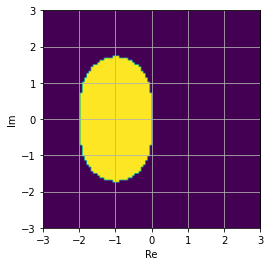

In [5]:
# Region of stability for RK2 in yellow:
RK_plot(method=2)

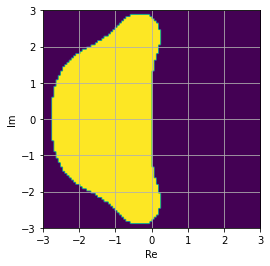

In [6]:
# Region of stability for RK4 in yellow:
RK_plot(method=4)

$\bullet$ Now we can use the method of lines on the advection eqn and compare the eigenvalues of the discretization to the regions of stability of RK2&4

$$\frac{d\overrightarrow{y}}{dt}= v A\overrightarrow{y}$$

Matrix $A$ is some discretization matrix for the first spacial derivative, as an example we can take it to be formed by central finite differencing of $\mathcal{O}(h^2)$ accuracy for Dirichlet BCs. Then $A$ is a tridiagonal matrix that has 0 at its diagonal entries, v and -v in its super- and supra-diagonals, respectively. Then the eigenvalues are $2ivcos(\frac{j\pi}{N+1})$ for j from 1 to N, and they are all on the imaginary line. This implies that for this example, except at the origin, RK2 is unstable everywhere, and RK4 is unstable almost everywhere, except the points on the imaginary line in the neighborhood of 2i and -2i on the above figure. The method of lines is not a good method for advections because of this unstability